In [ ]:
#prepare newspaper data and merge

In [1]:
#from prep_data import *
df = read_and_clean()
print("Done...")

NameError: name 'read_and_clean' is not defined

# load data

In [9]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import numpy as np
import pandas as pd
import os, re, logging
from collections import defaultdict
import matplotlib.pyplot as plt

### set basepaths

In [38]:
#PATH_TO_DATA = '/home/anne/tmpanne/RPA_data/'

PATH_TO_DATA = '/Users/anne/surfdrive/uva/projects/RPA_KeepingScore/pickle_files/'
BASE = '/Users/anne/repos/RPA/resources/'
FILENAME = '20140718_dutchdictionary.txt'

#PATH_TO_DATA = '/Users/anne/surfdrive/uva/projects/RPA_KeepingScore/pickle_files/'

In [4]:
pd.__version__

'0.25.0'

In [5]:
# load data from current project: 
df1 = pd.read_pickle(PATH_TO_DATA + 'VK_TEL')
df1 = df1[['text_title', 'main_topic', 'main_topic_label']]
df1.rename(columns={'text_title' : 'text', 'main_topic' : 'topic'}, inplace = True)

In [6]:
# load data from Bjorn 
d2 = pd.read_pickle(PATH_TO_DATA + 'dataset_burscher.pkl')

In [7]:
d2['n'] =1
d2.groupby(d2.main_topic_label).agg({'n' :'sum'})

,n
main_topic_label,
Arbeid,217
Buitenlandse zaken en ontwikkelingssamenwerking,1109
Burgerrechten en vrijheden,327
Defensie,394
Energiebeleid,81
Functioneren democratie en openbaar bestuur,1303
"Gemeenschapsontwikkeling, huisvestingsbeleid en stedelijke planning",114
Gezondheid,445
Immigratie en integratie,151


In [10]:
# recode so to match Bjorn's datset

a = ['Buitenlandse handel' , 'Kunst, cultuur en entertainment' , 'Ruimtelijke ordening, publiek natuur- en waterbeheer', 'Toegevoegde codes voor media'] 
b = ['Overige' ] * len(a)

overige_cat = dict(zip(a,b))
print(overige_cat)

df1['main_topic_label'].replace(overige_cat, inplace = True)
len(df1['main_topic_label'].unique())

{'Buitenlandse handel': 'Overige', 'Kunst, cultuur en entertainment': 'Overige', 'Ruimtelijke ordening, publiek natuur- en waterbeheer': 'Overige', 'Toegevoegde codes voor media': 'Overige'}


19

In [11]:
df1['n'] =1
df1.groupby(df1.main_topic_label).agg({'n' :'sum'})

,n
main_topic_label,
Arbeid,20
Buitenlandse zaken en ontwikkelingssamenwerking,48
Burgerrechten en vrijheden,29
Defensie,24
Energiebeleid,15
Functioneren democratie en openbaar bestuur,203
"Gemeenschapsontwikkeling, huisvestingsbeleid en stedelijke planning",23
Gezondheid,22
Immigratie en integratie,30


#### merge manual coding with dataset of Bjorn

In [59]:
df = df1.append(d2)
df = df.sample(300)
df.reset_index(drop=True, inplace=True)
df['documentnr'] = df.index

In [99]:
df = pd.read_pickle(PATH_TO_DATA + 'all_data.pkl')

In [91]:
svm = Pipeline([("vect", TfidfVectorizer()),
                ("svm", SGDClassifier(loss='hinge', penalty='elasticnet', tol=1e-4, alpha=1e-6, max_iter=5000, random_state=42))
                ])

0.6418806268756252

14991

#### code text according to dictionary of belgian study

In [62]:
df = get_merged_df(df)

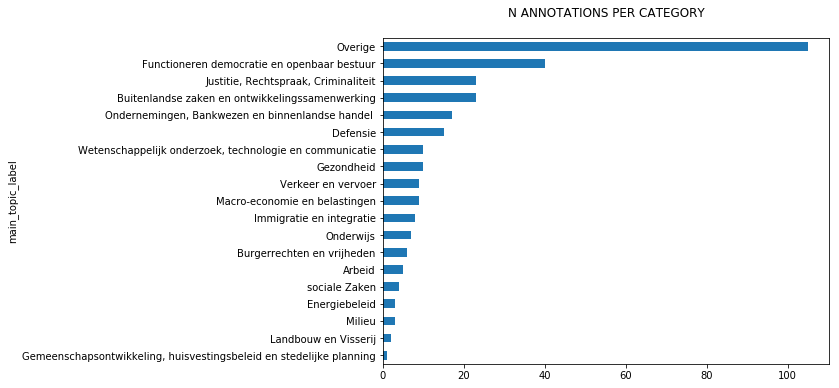

In [67]:
# verdeling annotaties per categorie. 
fig = plt.figure(figsize=(8,6))

df.groupby('main_topic_label').text_x.count().sort_values().plot.barh(ylim=0, title= 'N ANNOTATIONS PER CATEGORY\n')
plt.show()

In [84]:
df['id'] = df.index

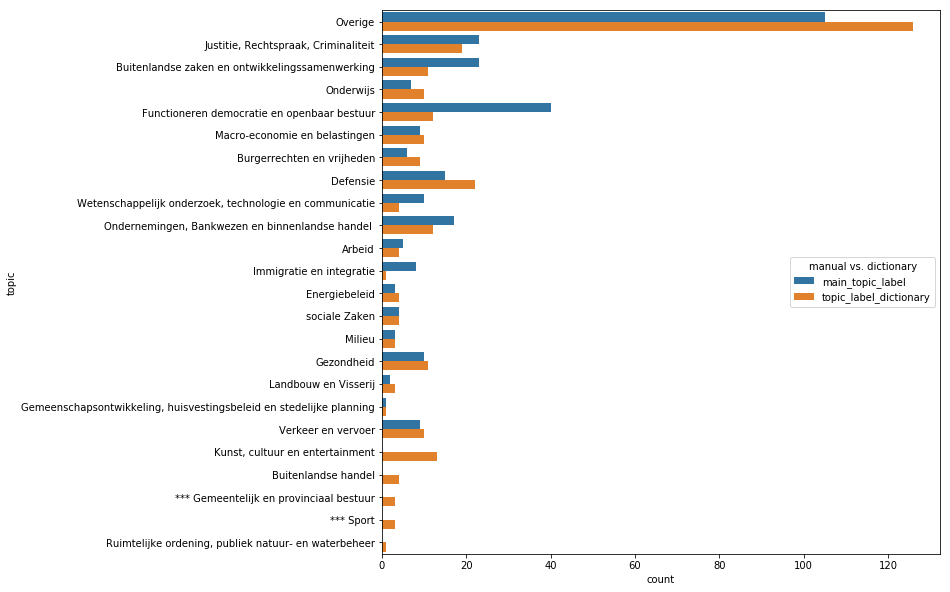

In [97]:
import seaborn as sns

plt.rcParams['figure.figsize']=(10,10)
ax = sns.countplot(y="topic", hue='manual vs. dictionary', data=melted)

In [101]:
df['main_topic_id']  = df['main_topic_label'].factorize()[0]

data = list(df.text_x)
labels = df.main_topic_id

print("The variable document has the type: {} and the length: {} \n \
The variable labels has the type: {} and the length: {}".format(type(data), len(data), type(labels), len(labels)))

The variable document has the type: <class 'list'> and the length: 300 
 The variable labels has the type: <class 'pandas.core.series.Series'> and the length: 300


In [106]:
import pandas as pd
PATH_TO_DATA = '~/surfdrive/uva/projects/RPA_KeepingScore/pickle_files/'

def get_data():
    df = pd.read_pickle(PATH_TO_DATA + 'all_data.pkl')
    df['main_topic_id']  = df['main_topic_label'].factorize()[0]
    data = df.text_x.to_list()
    labels = df.main_topic_id
    return data, labels

In [107]:
data, labels = get_data()

In [58]:
import pandas as pd

PATH_TO_DATA = '~/surfdrive/uva/projects/RPA_KeepingScore/pickle_files/'
df = pd.read_pickle(PATH_TO_DATA + 'all_data.pkl')

X_train , X_test , y_train , y_test = train_test_split (df['text_x'], df['main_topic_label'], test_size = 0.2 , random_state =42)


df['main_topic_id']  = df['main_topic_label'].factorize()[0]

In [59]:
data = df.text_x.to_list()
labels = df.main_topic_id

In [310]:
X_train , X_test , y_train , y_test = train_test_split (df['text_x'], df['main_topic_label'], test_size = 0.2 , random_state =42)

model = Pipeline([("vect", TfidfVectorizer()),
                            ("svm", SGDClassifier(loss='hinge', penalty='elasticnet', tol=1e-4, alpha=1e-6, max_iter=5000, random_state=42))
                            ])




In [311]:
clf = model.fit(X_train, y_train)
score = clf.score(X_test, y_test)

y_hats = clf.predict(X_test)
#y_test['preds'] = y_hats


#y_test['preds'] = y_hats
#pd.merge(df,y_test[['preds']],how = 'inner',left_index = True, right_index = True)

In [317]:
#print(y_hats)
print(len(y_test.values))
print(len(y_hats))

2999
2999


In [320]:
for i in y_hats:
    print(i)

Overige
Overige
Overige
Ondernemingen, Bankwezen en binnenlandse handel 
Defensie
Overige
Overige
Overige
Justitie, Rechtspraak, Criminaliteit
Verkeer en vervoer
Ondernemingen, Bankwezen en binnenlandse handel 
Functioneren democratie en openbaar bestuur
Overige
Overige
Functioneren democratie en openbaar bestuur
Overige
Defensie
Ondernemingen, Bankwezen en binnenlandse handel 
Buitenlandse zaken en ontwikkelingssamenwerking
Functioneren democratie en openbaar bestuur
Verkeer en vervoer
Overige
Overige
Overige
Overige
Gezondheid
Overige
Verkeer en vervoer
Wetenschappelijk onderzoek, technologie en communicatie
Overige
Landbouw en Visserij
Justitie, Rechtspraak, Criminaliteit
Functioneren democratie en openbaar bestuur
Overige
Macro-economie en belastingen
Macro-economie en belastingen
Overige
Buitenlandse zaken en ontwikkelingssamenwerking
Functioneren democratie en openbaar bestuur
Overige
Verkeer en vervoer
Justitie, Rechtspraak, Criminaliteit
Overige
Buitenlandse zaken en ontwikkeli

Overige
Justitie, Rechtspraak, Criminaliteit
Functioneren democratie en openbaar bestuur
Overige
Ondernemingen, Bankwezen en binnenlandse handel 
Wetenschappelijk onderzoek, technologie en communicatie
Overige
Justitie, Rechtspraak, Criminaliteit
Overige
Gezondheid
Functioneren democratie en openbaar bestuur
Buitenlandse zaken en ontwikkelingssamenwerking
Overige
Overige
Justitie, Rechtspraak, Criminaliteit
Buitenlandse zaken en ontwikkelingssamenwerking
Overige
Defensie
Ondernemingen, Bankwezen en binnenlandse handel 
Functioneren democratie en openbaar bestuur
Functioneren democratie en openbaar bestuur
Overige
Verkeer en vervoer
Overige
Overige
Overige
Overige
Overige
Ondernemingen, Bankwezen en binnenlandse handel 
Justitie, Rechtspraak, Criminaliteit
Wetenschappelijk onderzoek, technologie en communicatie
Overige
Overige
Overige
Overige
Overige
Overige
Justitie, Rechtspraak, Criminaliteit
Overige
Functioneren democratie en openbaar bestuur
Justitie, Rechtspraak, Criminaliteit
Over

In [203]:
d = { 0 : "Onderwijs" , 
1 : "Burgerrechten en vrijheden" , 
2 : "Justitie, Rechtspraak, Criminaliteit" , 
3 : "Defensie" , 
4 : "Gezondheid", 
5 : "Gemeenschapsontwikkeling, huisvestingsbeleid en stedelijke planning" ,
6 : "Functioneren democratie en openbaar bestuur" ,
7 : "Macro-economie en belastingen"    ,
8  : "Buitenlandse zaken en ontwikkelingssamenwerking" ,
9 : "Ondernemingen, Bankwezen en binnenlandse handel " ,
10 : "Arbeid" ,
11: "Verkeer en vervoer" ,
12: "Overige" ,
13: "sociale Zaken" ,
14: "Immigratie en integratie" ,
15: "Landbouw en Visserij" ,
16: "Energiebeleid" ,
17: "Milieu" ,
18: "Wetenschappelijk onderzoek, technologie en communicatie" }

In [204]:
model.fit(X_train, y_train)

y_hats = model.predict(X_test)

y_test['preds'] = y_hats
y_test['preds']

d_ = pd.merge(df, y_test, how = 'inner', left_index = True, right_index = True)

d_['main_topic_predicted'] = d_['y_hats'].map(d)

,documentnr,main_topic_label_x,origin,text_x,topic,type,topic_label_dictionary,index_words,smallest_index,len matches,...,"_tp Wetenschappelijk onderzoek, technologie en communicatie","_fp Wetenschappelijk onderzoek, technologie en communicatie","_fn Wetenschappelijk onderzoek, technologie en communicatie","st_tp Wetenschappelijk onderzoek, technologie en communicatie","st_fp Wetenschappelijk onderzoek, technologie en communicatie","st_fn Wetenschappelijk onderzoek, technologie en communicatie",main_topic_id,y_hats,main_topic_label_y,main_topic_predicted
3,3,Defensie,RPA,Oud-strijders uit oog en hart bij Defensie HI...,16,newspaper,Defensie,"[7, 16]",7.0,2.0,...,0,0,0,0,0,0,3,3,Defensie,Defensie
8,8,Functioneren democratie en openbaar bestuur,RPA,Wethouder in nauw na gesjoemel bureau HIGHLIG...,20,newspaper,"Justitie, Rechtspraak, Criminaliteit",[31],31.0,1.0,...,0,0,0,0,0,0,6,6,Functioneren democratie en openbaar bestuur,Functioneren democratie en openbaar bestuur
14,14,Functioneren democratie en openbaar bestuur,RPA,Rotterdam tekent vrede met Peper; Raad zet pu...,20,newspaper,*** Gemeentelijk en provinciaal bestuur,[61],61.0,1.0,...,0,0,0,0,0,0,6,6,Functioneren democratie en openbaar bestuur,Functioneren democratie en openbaar bestuur
15,15,Functioneren democratie en openbaar bestuur,RPA,PARTIJEN NEK AAN NEK IN PEILING Van onze parl...,20,newspaper,Overige,NaN,NaN,0.0,...,0,0,0,0,0,0,6,6,Functioneren democratie en openbaar bestuur,Functioneren democratie en openbaar bestuur
19,19,"Ondernemingen, Bankwezen en binnenlandse handel",RPA,'Winkeltijden in hele grensstreek soepeler'; ...,15,newspaper,Overige,NaN,NaN,0.0,...,0,0,0,0,0,0,9,9,"Ondernemingen, Bankwezen en binnenlandse handel","Ondernemingen, Bankwezen en binnenlandse handel"
27,27,Functioneren democratie en openbaar bestuur,RPA,"Uw stem wordt wel geteld, maar telt niet mee ...",20,newspaper,Macro-economie en belastingen,[106],106.0,1.0,...,0,0,0,0,0,0,6,3,Functioneren democratie en openbaar bestuur,Defensie
31,31,Macro-economie en belastingen,RPA,Harde werker gepakt; Lenteakkoord kent bitter...,1,newspaper,Macro-economie en belastingen,"[36, 209]",36.0,2.0,...,0,0,0,0,0,0,7,7,Macro-economie en belastingen,Macro-economie en belastingen
33,33,Functioneren democratie en openbaar bestuur,RPA,Al veel voorpret bij D66 De harde kern van D6...,20,newspaper,Overige,NaN,NaN,0.0,...,0,0,0,0,0,0,6,6,Functioneren democratie en openbaar bestuur,Functioneren democratie en openbaar bestuur
35,35,Functioneren democratie en openbaar bestuur,RPA,PvdA met mond vol tanden Van onze parlementai...,20,newspaper,Macro-economie en belastingen,[218],218.0,1.0,...,0,0,0,0,0,0,6,6,Functioneren democratie en openbaar bestuur,Functioneren democratie en openbaar bestuur
41,41,Burgerrechten en vrijheden,RPA,'Vrijheid betekent juist dat je met elkaar w...,2,newspaper,Onderwijs,"[212, 160]",160.0,2.0,...,0,0,0,0,0,0,1,1,Burgerrechten en vrijheden,Burgerrechten en vrijheden


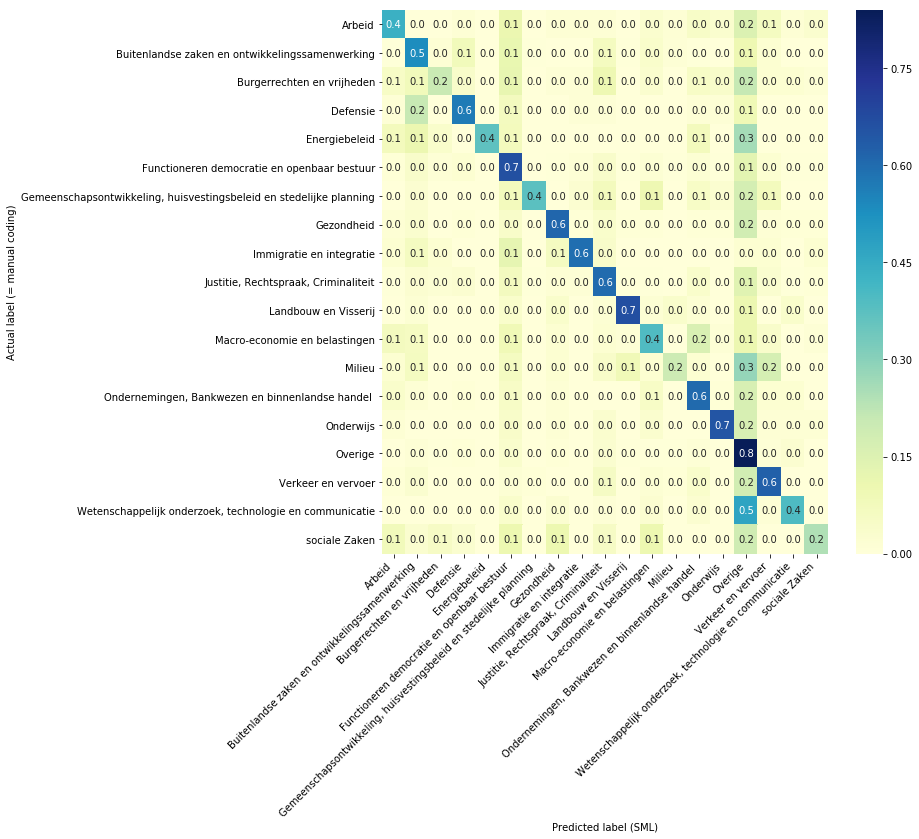

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix = pd.crosstab(d_['main_topic_label_x'], d_['main_topic_predicted'], rownames=['Actual'], colnames=['Predicted'])

cmn = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))

heatmap = sns.heatmap(cmn, annot=True, fmt='.1f', cmap="YlGnBu")
fontsize = 10
#sns.heatmap(cmn, annot=True, fmt='.1f', cmap="YlGnBu")

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)

plt.ylabel('Actual label (= manual coding)')
plt.xlabel('Predicted label (SML)')

#plt.xticks(rotation=90)

plt.show(block=False)
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

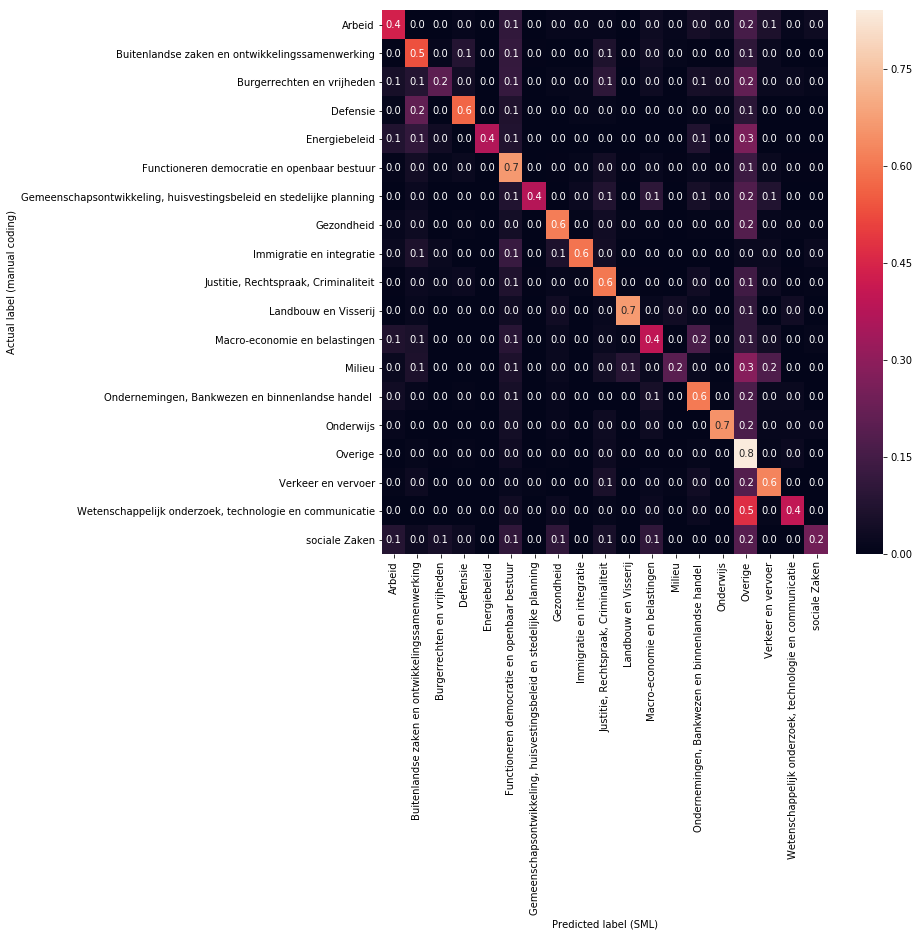

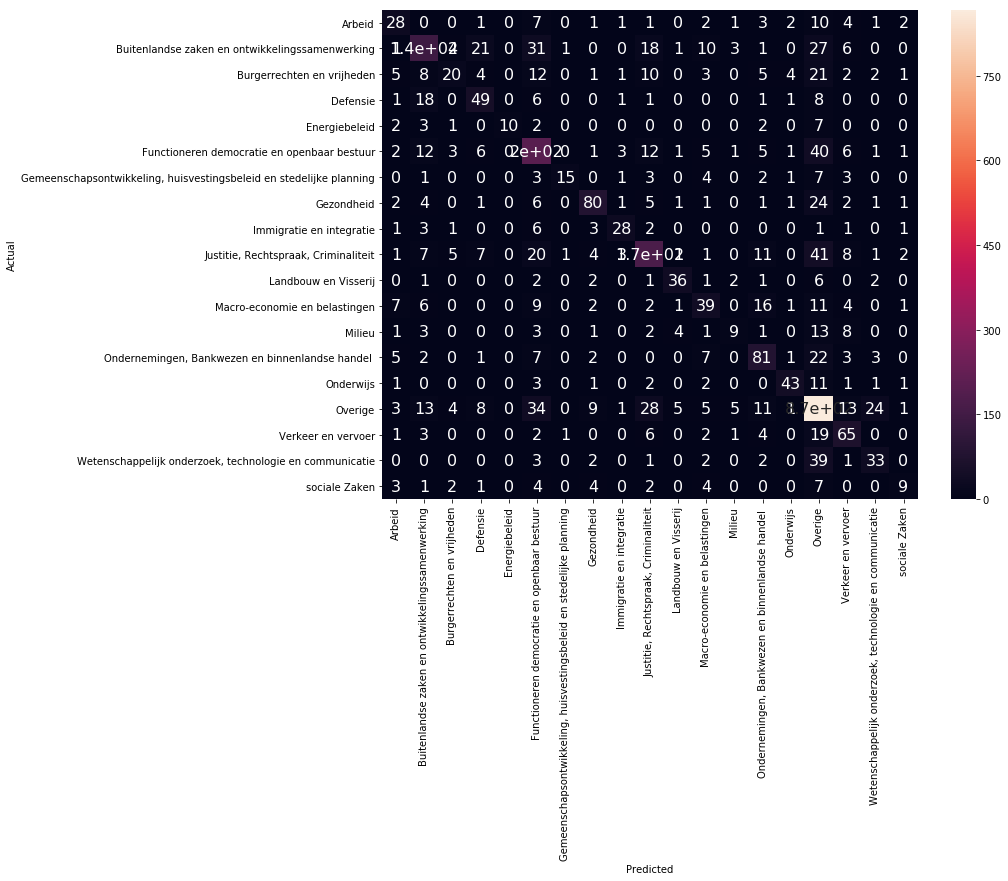

In [225]:
plt.figure(figsize = (12,9))
sns.heatmap(confusion_matrix , annot=True, annot_kws={"size": 16})


In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig


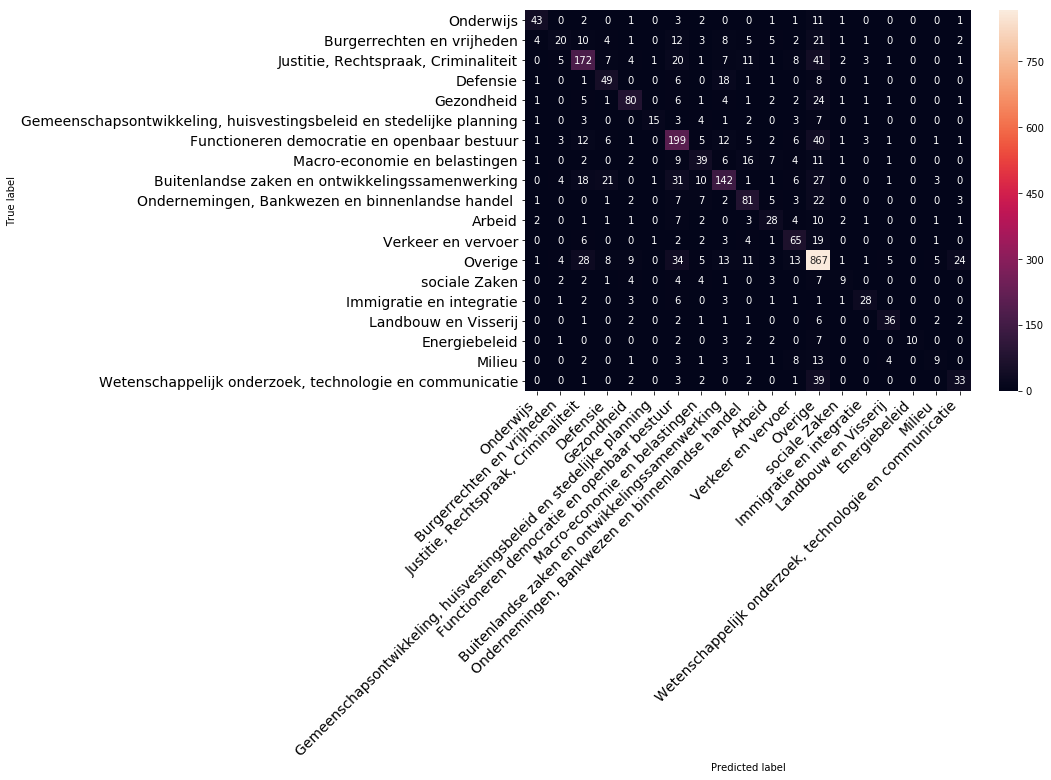

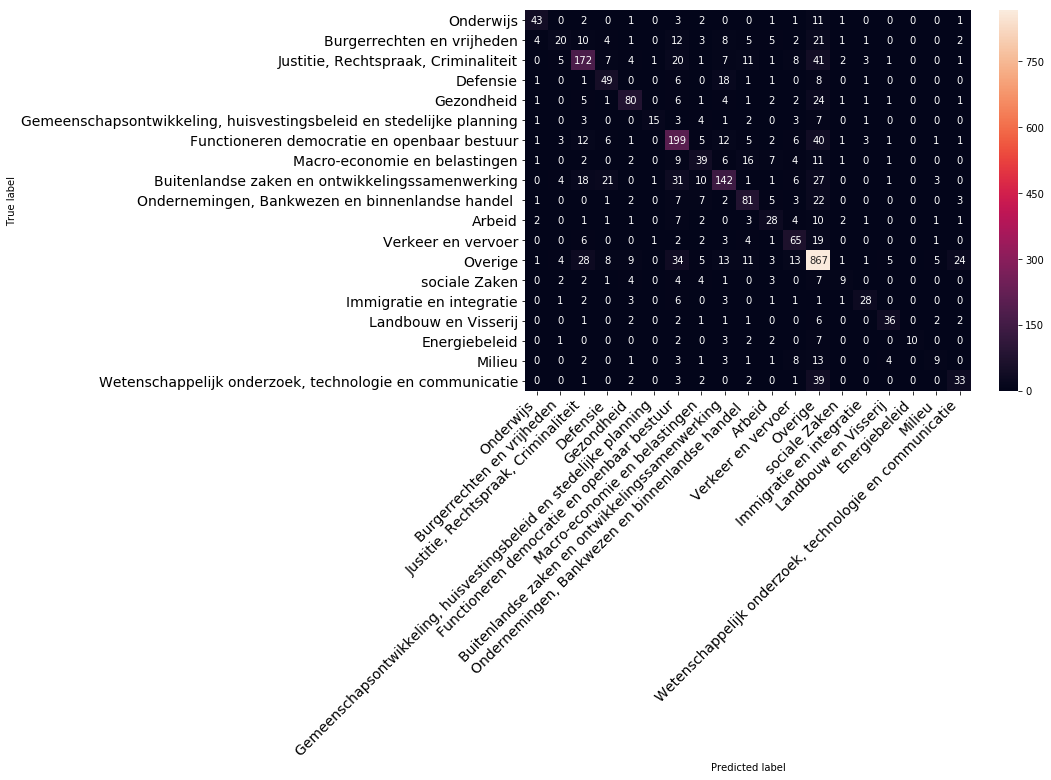

In [235]:
print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14)

__main__
_test_cm: test function with confusion matrix done
and pause


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:63: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


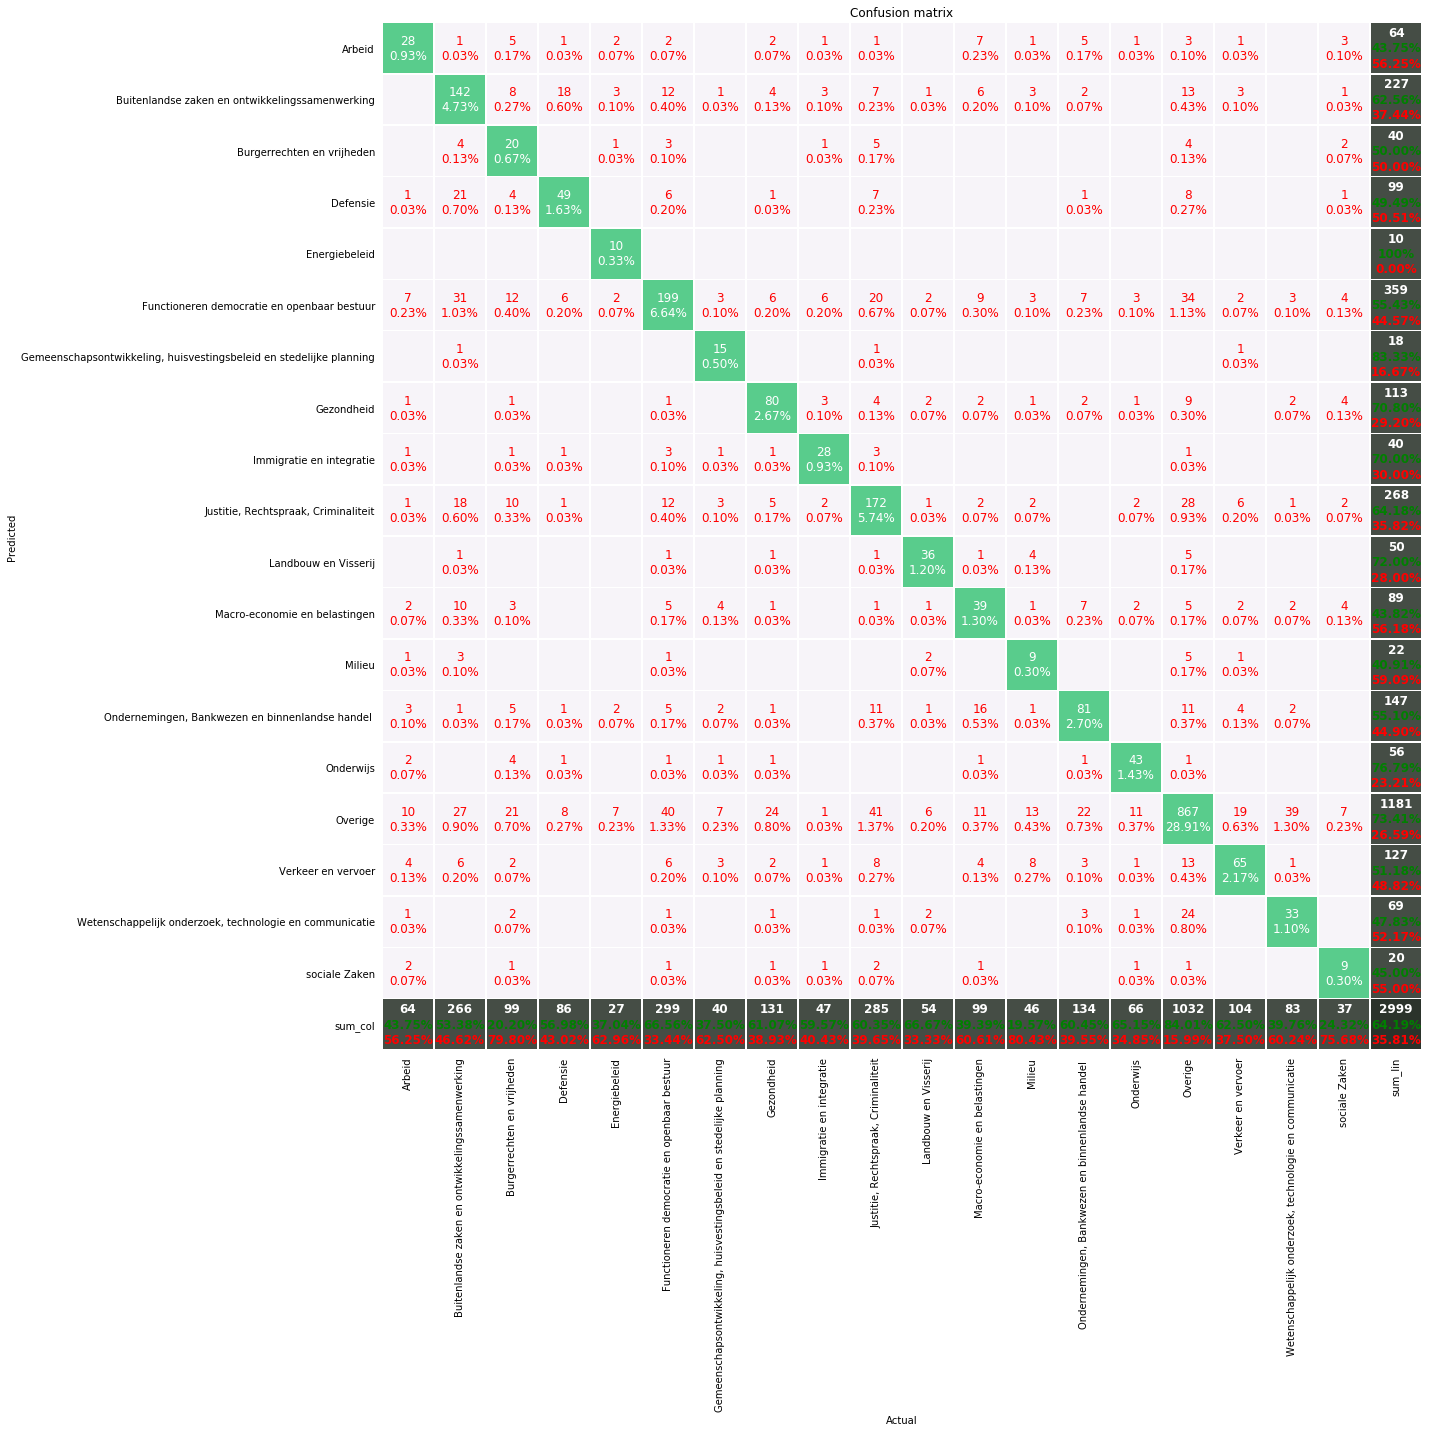

_test_data_class: test function with y_test (actual values) and predictions (predic)


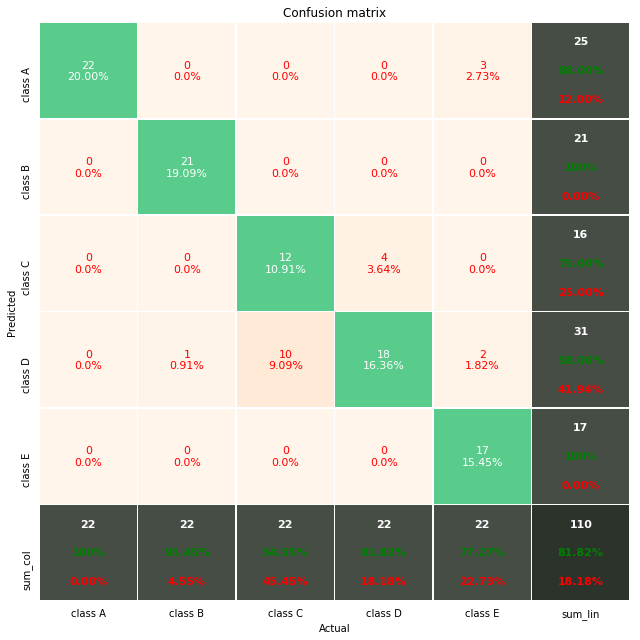

In [264]:
"""
plot a pretty confusion matrix with seaborn
Created on Mon Jun 25 14:17:37 2018
@author: Wagner Cipriano - wagnerbhbr - gmail - CEFETMG / MMC
REFerences:
  https://www.mathworks.com/help/nnet/ref/plotconfusion.html
  https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report
  https://stackoverflow.com/questions/5821125/how-to-plot-confusion-matrix-with-string-axis-rather-than-integer-in-python
  https://www.programcreek.com/python/example/96197/seaborn.heatmap
  https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/31720054
  http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
"""

#imports
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh
import seaborn as sn


def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1
#

def configcell_text_and_colors(array_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:o
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=fz)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = 'g'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.27, 0.30, 0.27, 1.0]
        if(col == ccl - 1) and (lin == ccl - 1):
            carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = '%s\n%.2f%%' %(cell_val, per)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0\n0.0%'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('w')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.35, 0.8, 0.55, 1.0]
        else:
            oText.set_color('r')

    return text_add, text_del
#

def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm['sum_lin'] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc['sum_col'] = sum_col
    #print ('\ndf_cm:\n', df_cm, '\n\b\n')
#

def pretty_plot_confusion_matrix(df_cm, annot=True, cmap="Oranges", fmt='.1f', fz=12,
      lw=0.5, cbar=False, figsize=[20,20], show_null_values=0, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    ax = sn.heatmap(df_cm, annot=annot, annot_kws={"size": fz}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='w', fmt=fmt)

    #set ticklabels rotation
    ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize = 10)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()

    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    text_add = []; text_del = [];
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts: #ax.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0]);
        posi += 1
        #print ('>>> pos: %s, posi: %s, val: %s, txt: %s' %(pos, posi, array_df[lin][col], t.get_text()))

        #set text
        txt_res = configcell_text_and_colors(array_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Confusion matrix')
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    plt.tight_layout()  #set layout slim
    plt.show()
#

def plot_confusion_matrix_from_data(y_test, predictions, columns=None, annot=True, cmap="Oranges",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='lin'):
    """
        plot confusion matrix function with y_test (actual values) and predictions (predic),
        whitout a confusion matrix yet
    """
    from sklearn.metrics import confusion_matrix
    from pandas import DataFrame

    #data
    if(not columns):
        #labels axis integer:
        ##columns = range(1, len(np.unique(y_test))+1)
        #labels axis string:
        from string import ascii_uppercase
        columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

    confm = confusion_matrix(y_test, predictions)
    cmap = 'Oranges';
    fz = 11;
    figsize=[9,9];
    show_null_values = 2
    df_cm = DataFrame(confm, index=columns, columns=columns)
    pretty_plot_confusion_matrix(df_cm, fz=fz, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)
#



#
#TEST functions
#
def _test_cm():
    #test function with confusion matrix done
    #get pandas dataframe
    df_cm = confusion_matrix
    #colormap: see this and choose your more dear
    cmap = 'PuRd'
    pretty_plot_confusion_matrix(df_cm, cmap=cmap)
#

def _test_data_class():
    """ test function with y_test (actual values) and predictions (predic) """
    #data
    y_test = np.array([1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5])
    predic = np.array([1,2,4,3,5, 1,2,4,3,5, 1,2,3,4,4, 1,4,3,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,3,3,5, 1,2,3,3,5, 1,2,3,4,4, 1,2,3,4,1, 1,2,3,4,1, 1,2,3,4,1, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5])
    """
      Examples to validate output (confusion matrix plot)
        actual: 5 and prediction 1   >>  3
        actual: 2 and prediction 4   >>  1
        actual: 3 and prediction 4   >>  10
    """
    columns = []
    annot = True;
    cmap = 'Oranges';
    fmt = '.2f'
    lw = 0.5
    cbar = False
    show_null_values = 2
    pred_val_axis = 'y'
    #size::
    fz = 12;
    figsize = [9,9];
    if(len(y_test) > 10):
        fz=9; figsize=[14,14];
    plot_confusion_matrix_from_data(y_test, predic, columns,
      annot, cmap, fmt, fz, lw, cbar, figsize, show_null_values, pred_val_axis)
#


#
#MAIN function
#
if(__name__ == '__main__'):
    print('__main__')
    print('_test_cm: test function with confusion matrix done\nand pause')
    _test_cm()
    plt.pause(5)
    print('_test_data_class: test function with y_test (actual values) and predictions (predic)')
    _test_data_class()

In [123]:
y_hats2 = model.predict(X_test)
#df['y_hats'] = y_hats2

In [124]:
y_test['preds'] = y_hats2

In [128]:
pd.merge(df,y_test[['preds']],how = 'inner',left_index = True, right_index = True)

,documentnr,main_topic_label,origin,text_x,topic,type,topic_label_dictionary,index_words,smallest_index,len matches,...,st_fn Milieu,"_tp Wetenschappelijk onderzoek, technologie en communicatie","_fp Wetenschappelijk onderzoek, technologie en communicatie","_fn Wetenschappelijk onderzoek, technologie en communicatie","st_tp Wetenschappelijk onderzoek, technologie en communicatie","st_fp Wetenschappelijk onderzoek, technologie en communicatie","st_fn Wetenschappelijk onderzoek, technologie en communicatie",main_topic_id_x,y_hats,main_topic_id_y


In [114]:
y_hats = model.predict(X_test)
y_test['preds'] = y_hats

df_out = pd.merge(df,y_test[['preds']],how = 'left',left_index = True, right_index = True)


In [184]:
df['main_topic_label'].unique()

array(['Onderwijs', 'Burgerrechten en vrijheden',
       'Justitie, Rechtspraak, Criminaliteit', 'Defensie', 'Gezondheid',
       'Gemeenschapsontwikkeling, huisvestingsbeleid en stedelijke planning',
       'Functioneren democratie en openbaar bestuur',
       'Macro-economie en belastingen',
       'Buitenlandse zaken en ontwikkelingssamenwerking',
       'Ondernemingen, Bankwezen en binnenlandse handel ', 'Arbeid',
       'Verkeer en vervoer', 'Overige', 'sociale Zaken',
       'Immigratie en integratie', 'Landbouw en Visserij',
       'Energiebeleid', 'Milieu',
       'Wetenschappelijk onderzoek, technologie en communicatie'],
      dtype=object)

In [119]:
df_out['preds']

KeyError: 'preds'

In [182]:
label_to_id = df.groupby('main_topic_id').max()
label_to_id['main_topic_label']

main_topic_id
0                                             Onderwijs
1                            Burgerrechten en vrijheden
2                  Justitie, Rechtspraak, Criminaliteit
3                                              Defensie
4                                            Gezondheid
5     Gemeenschapsontwikkeling, huisvestingsbeleid e...
6           Functioneren democratie en openbaar bestuur
7                         Macro-economie en belastingen
8       Buitenlandse zaken en ontwikkelingssamenwerking
9      Ondernemingen, Bankwezen en binnenlandse handel 
10                                               Arbeid
11                                   Verkeer en vervoer
12                                              Overige
13                                        sociale Zaken
14                             Immigratie en integratie
15                                 Landbouw en Visserij
16                                        Energiebeleid
17                                

In [113]:
df_out = pd.DataFrame()
df_out = X_test.reset_index()

df_out["Actual"] = y_test.reset_index()["Columns_Name"]
df_out["Prediction"] = y_hats.reset_index()[0]

y_test['preds'] = y_hats

df_out = pd.merge(df,y_test[['preds']],how = 'left',left_index = True, right_index = True)

AttributeError: 'list' object has no attribute 'reset_index'

In [233]:
class_names = df.groupby('main_topic_id')['main_topic_label'].max().to_list()

In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,  TfidfTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
import logging
import json

PATH_TO_DATA = '~/surfdrive/uva/projects/RPA_KeepingScore/data/'
FILENAME = 'RPA_and_Buschers_data_with_dictionaryscores.pkl'

OUTPUT_PATH ='../output/'

def get_data():
    df = pd.read_pickle(PATH_TO_DATA + FILENAME)
    return df

In [297]:
def gridsearch_with_classifiers(sample):
    
    df = get_data()
    
    if sample == 'totalsample':
        df = df
    elif sample == 'newspaper_sample_only':
        df = df[df['type'] == 'newspaper']
    elif sample == 'pq_sample_only' :
        df = df[df['type'] == 'parlementary question']
    elif sample == 'RPA_sample' :
        df = df[df['origin'] == 'RPA']
    elif sample == 'Bjorns_sample' :
        df = df[df['origin'] == 'Bjorn']
        
    X_train , X_test , y_train , y_test = train_test_split (df['text_x'], df['main_topic_label'], test_size = 0.2 , random_state =42)
    
    class_report = []

    names = [
             "Naive Bayes",
             "Passive Agressive",
             "SGDClassifier"
            ]

    classifiers = [
        MultinomialNB(),
        PassiveAggressiveClassifier(),
        SGDClassifier(),
    ]

    parameters = [
                 {'vect__ngram_range': [(1, 1), (1, 2)],
                  'clf__alpha': (1e-2, 1e-3, 1e-5)},

                {

                'clf__loss': ('hinge', 'squared_hinge'),
                'clf__C': (0.01, 0.5, 1.0)   ,
                'clf__fit_intercept': (True, False) , 
                'vect__ngram_range': [(1, 1), (1, 2)] ,
                'tfidf__use_idf' :(True ,False),
                'clf__max_iter': (5 ,10 ,15)

                } ,

                  {'clf__max_iter': (20, 30) , 
                   'clf__alpha': (1e-2, 1e-3, 1e-5), 
                   'clf__penalty': ('l2', 'elasticnet')} 
                 ]

    for name, classifier, params in zip(names, classifiers, parameters):
        print(name)
        print(classifier)
        print(params)
        clf_pipe = Pipeline([
            ('vect', TfidfVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('clf', classifier),
        ])

        gs_clf = GridSearchCV(clf_pipe, param_grid=params, n_jobs=-1, cv=3)
        clf = gs_clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("{} score: {}".format(name, score))
        print("{} are the best estimators".format(clf.best_estimator_))
        results_to_dict = classification_report((clf.best_estimator_.predict(X_test)), y_test, output_dict= True)

        results_to_dict['classifier:'] = classifier
        results_to_dict['best estimators:'] = clf.best_estimator_

        print("Created dictionary with classification report: \n\n{}".format(results_to_dict))

        class_report.append(results_to_dict)
        
        return class_report
    
   # results_to_dict = metrics.classification_report((clf.best_estimator_.predict(X_test), y_test), output_dict=True ) 
    #print(classification_report(, y_pred, target_names=target_names))

In [305]:
def get_scores(sample):
    class_report = class_report
    
    fname = '{}precision_recall_f1score_dictionary_SML{}.json'.format(OUTPUT_PATH, sample)
    
    with open(fname, mode='w') as fo:
        json.dump(class_report, fo)
    
if __name__ == "__main__":

    logger = logging.getLogger()
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
    logging.root.setLevel(level=logging.INFO)

    get_scores(sample="totalsample")
    get_scores(sample="newspaper_sample_only")
    get_scores(sample="pq_sample_only")
    get_scores(sample="RPA_sample")
    get_scores(sample="Bjorns_sample")

UnboundLocalError: local variable 'class_report' referenced before assignment

In [302]:
#class_report = gridsearch_with_classifiers()

print("check which classifier works best: \n\n ")

for i in class_report:
    print("\n",i['best estimators:'])
    print(i['weighted avg'])

check which classifier works best: 

 

 Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
...ear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True))])
{'precision': 0.6604753177617498, 'recall': 0.6352117372457485, 'f1-score': 0.6430152843165964, 'support': 2999}

 Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...       shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
              w

In [ ]:
cl = Pipeline([("vect", TfidfVectorizer()),
                ("svm", SGDClassifier(loss='hinge', penalty='elasticnet', tol=1e-4, alpha=1e-6, max_iter=5000, random_state=42))
                ])



In [66]:
rf = PassiveAggressiveClassifier(random_state = 42, loss = 'hinge')
rf.get_params()

{'C': 1.0,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'fit_intercept': True,
 'loss': 'hinge',
 'max_iter': None,
 'n_iter': None,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'random_state': 42,
 'shuffle': True,
 'tol': None,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [82]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

names = [
         "Naive Bayes",
         "Linear SVM",
         "Logistic Regression",
         "Random Forest",
         "Multilayer Perceptron"
        ]

classifiers = [
    MultinomialNB(),
    LinearSVC(),
    LogisticRegression(),
    RandomForestClassifier(),
    MLPClassifier()
]

parameters = [
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__alpha': (1e-2, 1e-3)},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__C': (np.logspace(-5, 1, 5))},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__C': (np.logspace(-5, 1, 5))},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__max_depth': (1, 2)},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__alpha': (1e-2, 1e-3)}
             ]

for name, classifier, params in zip(names, classifiers, parameters):
    clf_pipe = Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', classifier),
    ])
    
    gs_clf = GridSearchCV(clf_pipe, param_grid=params, n_jobs=-1)
    clf = gs_clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("{} score: {}".format(name, score))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Naive Bayes score: 0.4485294117647059


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Linear SVM score: 0.5220588235294118


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/V

Logistic Regression score: 0.4411764705882353


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/V

Random Forest score: 0.3014705882352941


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Multilayer Perceptron score: 0.4338235294117647


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [83]:
print("Best parameters:", clf.best_params_)

Best parameters: {'clf__alpha': 0.01, 'vect__ngram_range': (1, 1)}


In [80]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', SGDClassifier()),
])

parameters = [
    {
        'vect__max_df': (0.5, 0.75, 1.0),
        'clf': (SGDClassifier(),),
        'clf__alpha': (0.00001, 0.000001),
        'clf__penalty': ('l2', 'elasticnet'),
        'clf__max_iter': (10, 50, 80),
    }, {
        'vect__max_df': (0.5, 0.75, 1.0),
        'clf': (MultinomialNB(),),
        'clf__C': (0.01, 0.5, 1.0)
    }
]

#grid_search = GridSearchCV(pipeline, parameters)

search = GridSearchCV(pipeline, parameters, iid=False, cv=5)
search.fit(X_train, y_train )   

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print()
print("Best parameters:", search.best_params_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be r

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be r

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be r

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be r

KeyboardInterrupt: 